In [40]:
import pandas as pd

df = pd.read_csv("BI_Hackathon_Data.csv")
df.isna().sum()
#since some columns have too much missing value, we decide to delter those columns in analyzing
col = ['equalinc','nbgoodc','nbstatus','nbmedia','exbuscon','exreason','bafund','barel','TEAJOBGR','EB_JOBGR','EB_OWNER','TEAOWNER','TEAJOBNOW','EB_JOBNOW','TEACOMPET', 'EB_COMPET','TEANEWPR','EB_NEWPR','TEANEWTEC','EB_NEWTEC','TEAEXPORT','EB_EXPORT']
df = df.drop(columns = col)
print(df)
df.isna().sum()
missingcols = ['knowent','opport','suskill','fearfail', 'futsup','discent','busang','age9c','hhsize']
df = df.dropna( subset = missingcols)
df.isna().sum()
df.to_csv(r'D:\Data Analyst\Babson Hackathon\Hackathon.csv', index = False, header = True)
df.TEA.value_counts()

       yrsurv  WEIGHT_L  WEIGHT_A  GEMHHINC  knowent  opport  suskill  \
0        2011  1.415335  1.470729     68100      0.0    -1.0      0.0   
1        2011  0.971677  1.009707      3467      0.0    -1.0      1.0   
2        2011  2.545694  2.645328      3467      0.0     1.0     -1.0   
3        2011  0.971677  1.009707        33      1.0     1.0      0.0   
4        2011  1.319954  1.371615        -2      0.0     0.0      1.0   
...       ...       ...       ...       ...      ...     ...      ...   
28371    2017  0.942671  0.952578     68100      1.0     1.0      1.0   
28372    2017  1.206530  1.219210        33      0.0     1.0      0.0   
28373    2017  1.053133  1.064201     68100      1.0     1.0      1.0   
28374    2017  1.057164  1.068274        -2      0.0     0.0      0.0   
28375    2017  0.799854  0.808260      3467      0.0     1.0      0.0   

       fearfail  futsup  discent  ...  hhsize  ushhinc  usreduc  ESTBBUSO  \
0           0.0     0.0      0.0  ...     5.0 

0    23101
1     2924
Name: TEA, dtype: int64

In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

new_england = df[df['Region'] == 1 ]
new_york = df[df['Region'] == 2 ]
mid_atlantic = df[df['Region'] == 3 ]
southeast = df[df['Region'] == 4 ]
great_lakes = df[df['Region'] == 5 ]
south_central = df[df['Region'] == 6 ]
midwest = df[df['Region'] == 7 ]
mountain_plains = df[df['Region'] == 8 ]
pacific_southwest = df[df['Region'] == 9 ]
pacific_northwest = df[df['Region'] == 10 ]

'''
new_england.to_csv(r'D:\Data Analyst\Babson Hackathon\new_england.csv', index = False, header = True)
new_york.to_csv(r'D:\Data Analyst\Babson Hackathon\new_york.csv', index = False, header = True)
mid_atlantic.to_csv(r'D:\Data Analyst\Babson Hackathon\mid_atlantic.csv', index = False, header = True)
southeast.to_csv(r'D:\Data Analyst\Babson Hackathon\southeast.csv', index = False, header = True)
great_lakes.to_csv(r'D:\Data Analyst\Babson Hackathon\great_lakes.csv', index = False, header = True)
south_central.to_csv(r'D:\Data Analyst\Babson Hackathon\south_central.csv', index = False, header = True)
midwest.to_csv(r'D:\Data Analyst\Babson Hackathon\midwest.csv', index = False, header = True)
mountain_plains.to_csv(r'D:\Data Analyst\Babson Hackathon\mountain_plains.csv', index = False, header = True)
pacific_southwest.to_csv(r'D:\Data Analyst\Babson Hackathon\pacific_southwest.csv', index = False, header = True)
pacific_northwest.to_csv(r'D:\Data Analyst\Babson Hackathon\pacific_northwest.csv', index = False, header = True)
'''

"\nnew_england.to_csv(r'D:\\Data Analyst\\Babson Hackathon\new_england.csv', index = False, header = True)\nnew_york.to_csv(r'D:\\Data Analyst\\Babson Hackathon\new_york.csv', index = False, header = True)\nmid_atlantic.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\mid_atlantic.csv', index = False, header = True)\nsoutheast.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\southeast.csv', index = False, header = True)\ngreat_lakes.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\great_lakes.csv', index = False, header = True)\nsouth_central.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\south_central.csv', index = False, header = True)\nmidwest.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\midwest.csv', index = False, header = True)\nmountain_plains.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\mountain_plains.csv', index = False, header = True)\npacific_southwest.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\pacific_southwest.csv', index = False, header = True)\npacific_northwest.to_csv(r'D:\\Data A

In [42]:
#linear regression
new_england = pd.read_csv("new_england.csv")
new_england = new_england.drop(columns = ['Region','TEANEC','TEAOPP'])
model_ols = smf.ols("TEA ~ yrsurv+GEMHHINC+knowent+opport+suskill+fearfail+futsup+discent+busang+gender+age9c+hhsize+ushhinc+usreduc+ESTBBUSO+IPACTLD_ALL+race", data=new_england_without_weight).fit()
print(model_ols.summary())
 
 

NameError: name 'new_england_without_weight' is not defined

In [ ]:
#linear regression with weight
y=new_england['TEA']
new_cols = ['yrsurv','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
x=new_england[new_cols]

## add a intercept point
x = sm.add_constant(x)
 
## Compute the weight and add it to the column named "weight_1"
 
model_wls_1 = sm.WLS(y, x, new_england_without_weight['WEIGHT_A'])
mod_res_1 = model_wls_1.fit()
print(mod_res_1.summary())



                            WLS Regression Results                            
Dep. Variable:                    TEA   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     8.082
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.43e-19
Time:                        23:02:37   Log-Likelihood:                -217.29
No. Observations:                 980   AIC:                             470.6
Df Residuals:                     962   BIC:                             558.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.2033     10.913      0.935      

LightGBM Model accuracy score: 0.8878
Training-set accuracy score: 0.9985
Training set score: 0.9985
Test set score: 0.8878
Confusion matrix

 [[260  10]
 [ 23   1]]

True Positives(TP) =  260

True Negatives(TN) =  1

False Positives(FP) =  10

False Negatives(FN) =  23
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       270
           1       0.09      0.04      0.06        24

    accuracy                           0.89       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.85      0.89      0.87       294



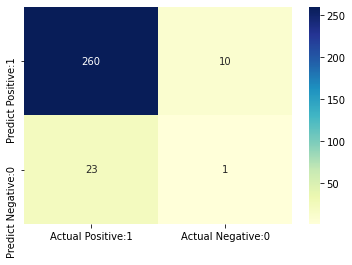

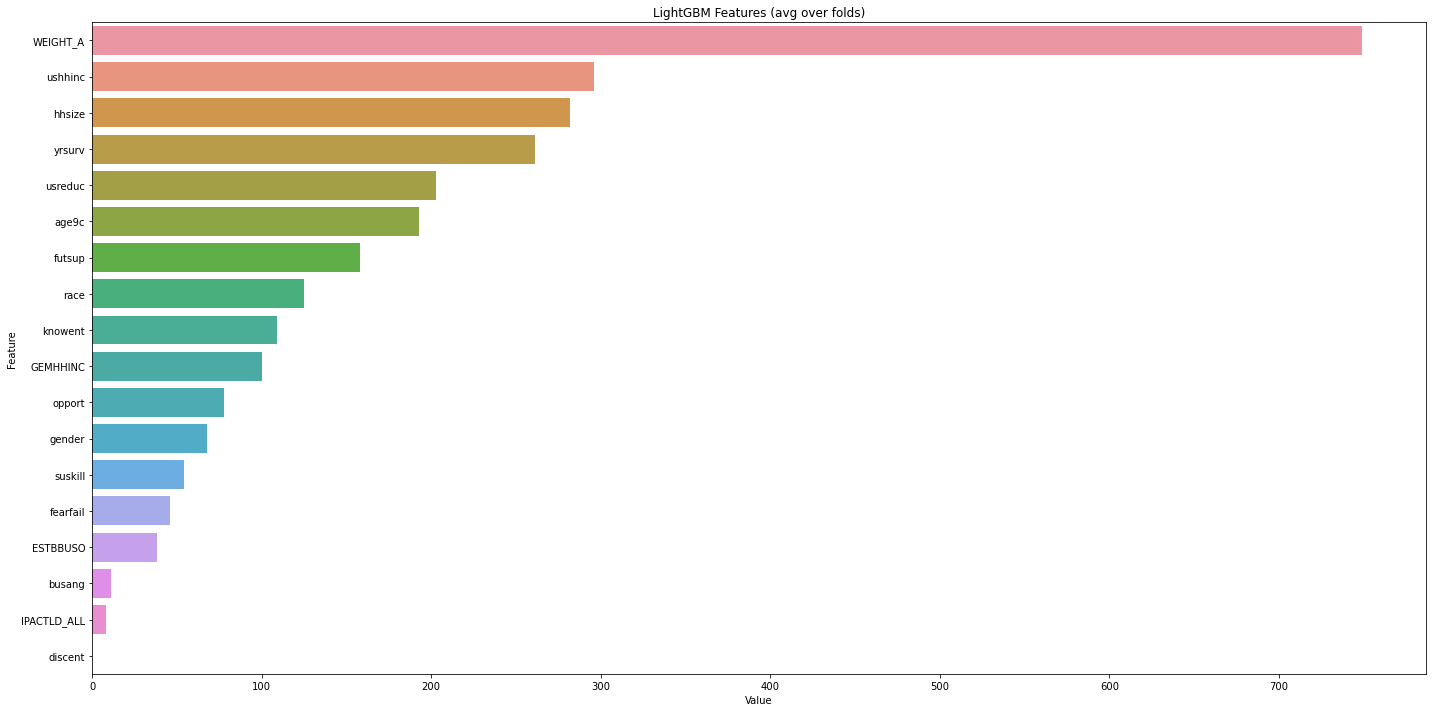

<Figure size 432x288 with 0 Axes>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

new_england = pd.read_csv("new_england.csv")
new_england = new_england.drop(columns = ['Region','TEANEC','TEAOPP','WEIGHT_L'])

new_england['TEA'].value_counts()

#Declare feature vector and target variable
y=new_england['TEA']

new_cols = ['yrsurv','WEIGHT_A','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
X_columns = ['yrsurv','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
x=new_england[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
                                 
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,new_england.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


LightGBM Model accuracy score: 0.8776
Training-set accuracy score: 0.9913
Training set score: 0.9913
Test set score: 0.8776
Confusion matrix

 [[255  15]
 [ 21   3]]

True Positives(TP) =  255

True Negatives(TN) =  3

False Positives(FP) =  15

False Negatives(FN) =  21
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       270
           1       0.17      0.12      0.14        24

    accuracy                           0.88       294
   macro avg       0.55      0.53      0.54       294
weighted avg       0.86      0.88      0.87       294



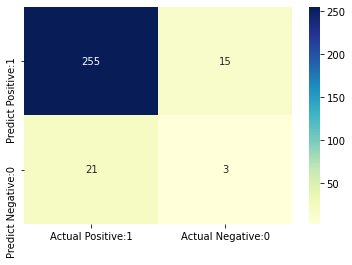

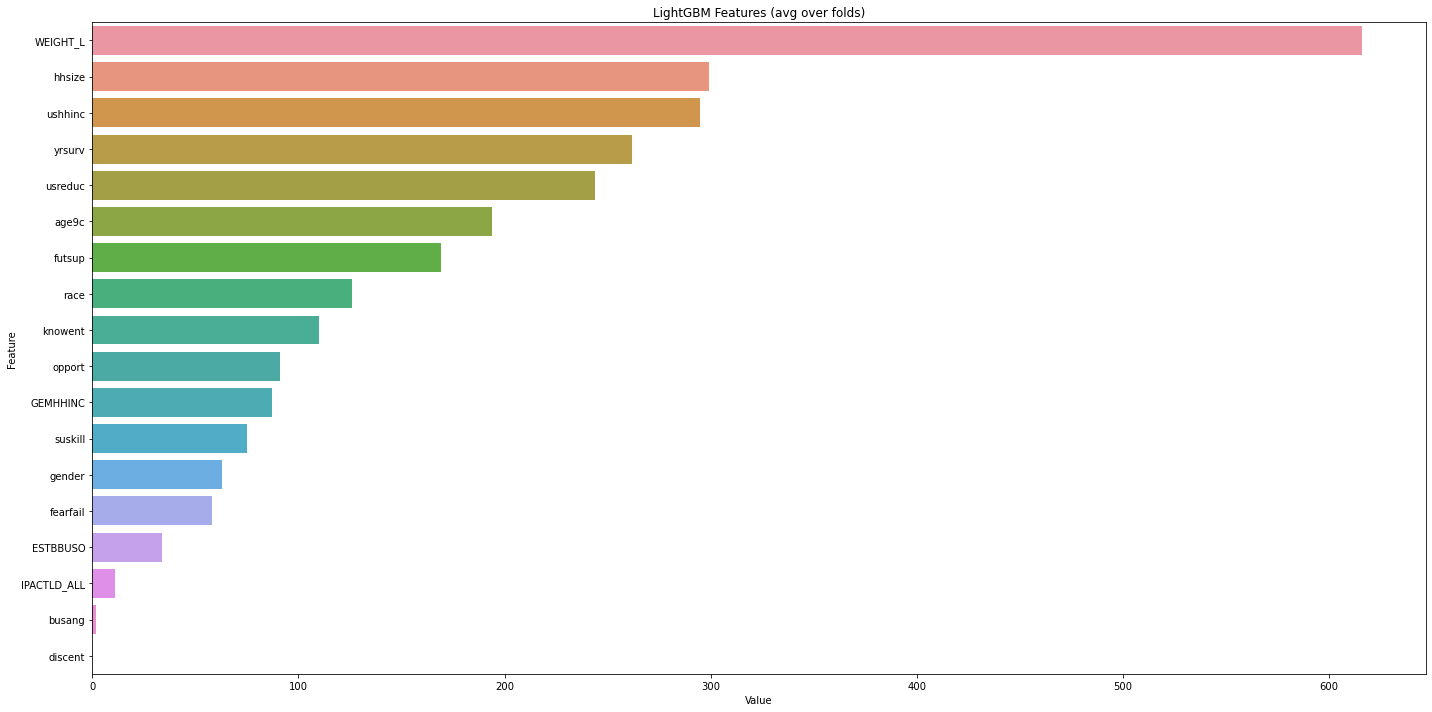

<Figure size 432x288 with 0 Axes>

In [ ]:
new_england_weightL = pd.read_csv("new_england.csv")
new_england_weightL = new_england_weightL.drop(columns = ['Region','TEANEC','TEAOPP','WEIGHT_A'])
new_england_weightL['WEIGHT_L'] = new_england_weightL['WEIGHT_L'].fillna(0)
new_england_weightL['TEA'].value_counts()

#Declare feature vector and target variable
y=new_england_weightL['TEA']

new_cols = ['yrsurv','WEIGHT_L','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
X_columns = ['yrsurv','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
x=new_england_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,new_england_weightL.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


LightGBM Model accuracy score: 0.8880
Training-set accuracy score: 0.9311
Training set score: 0.9311
Test set score: 0.8880
Confusion matrix

 [[1322   44]
 [ 126   26]]

True Positives(TP) =  1322

True Negatives(TN) =  26

False Positives(FP) =  44

False Negatives(FN) =  126
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1366
           1       0.37      0.17      0.23       152

    accuracy                           0.89      1518
   macro avg       0.64      0.57      0.59      1518
weighted avg       0.86      0.89      0.87      1518



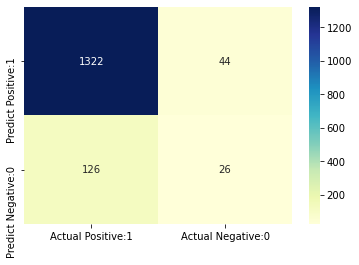

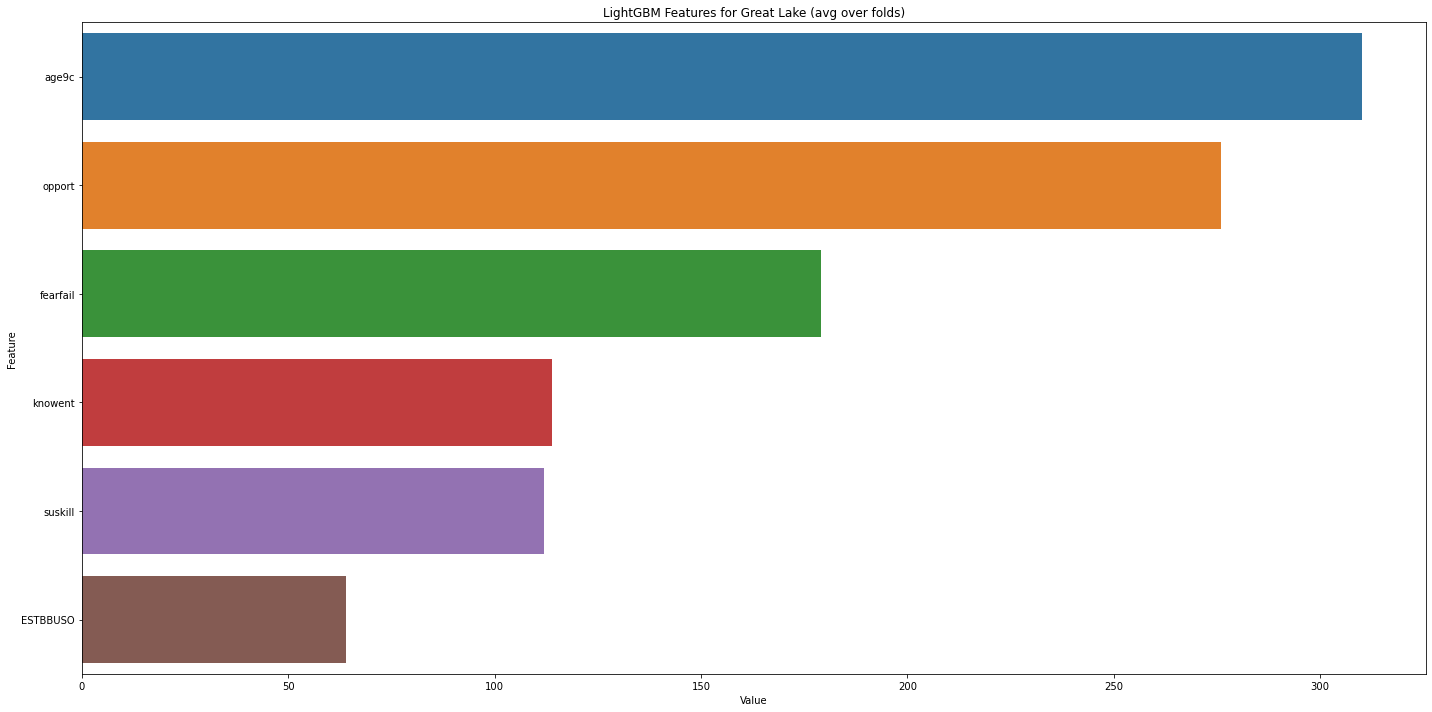

[ 114  112  310   64  276  179 1945]
          col_name
WEIGHT_A      1945
age9c          310
opport         276
fearfail       179
knowent        114
suskill        112
ESTBBUSO        64


<Figure size 432x288 with 0 Axes>

In [49]:
#Great Lakes with Weight A
great_lakes = pd.read_csv("great_lakes.csv")
cols = ['TEA','knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_A']
great_lakes = great_lakes[cols]

great_lakes['TEA'].value_counts()


#Declare feature vector and target variable
y=great_lakes['TEA']

new_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_A']
x=great_lakes[new_cols]

feature_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,great_lakes[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Great Lake (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

print(clf.feature_importances_)
feature_imporant = pd.DataFrame({'col_name': clf.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)
print(feature_imporant)

LightGBM Model accuracy score: 0.8827
Training-set accuracy score: 0.9319
Training set score: 0.9319
Test set score: 0.8827
Confusion matrix

 [[1308   58]
 [ 120   32]]

True Positives(TP) =  1308

True Negatives(TN) =  32

False Positives(FP) =  58

False Negatives(FN) =  120
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1366
           1       0.36      0.21      0.26       152

    accuracy                           0.88      1518
   macro avg       0.64      0.58      0.60      1518
weighted avg       0.86      0.88      0.87      1518



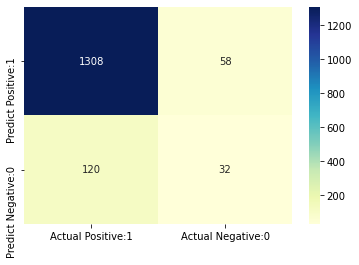

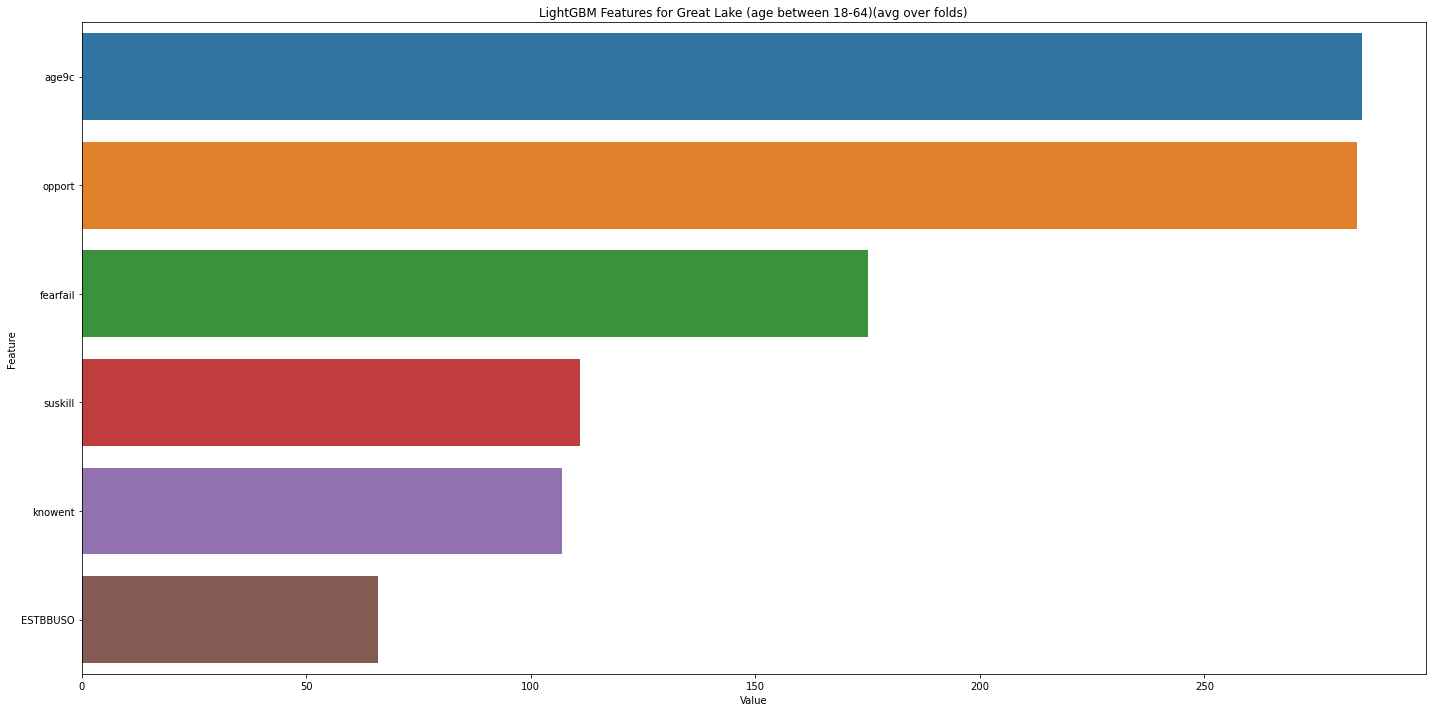

<Figure size 432x288 with 0 Axes>

In [ ]:
#Great Lake with weight L
great_lakes_weightL = pd.read_csv("great_lakes.csv")
cols = ['TEA','knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_L']
great_lakes_weightL = great_lakes_weightL[cols]
great_lakes_weightL['WEIGHT_L'] = great_lakes_weightL['WEIGHT_L'].fillna(0)


great_lakes_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=great_lakes_weightL['TEA']

new_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_L']
feature_cols =  ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail']
x=great_lakes_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,great_lakes_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Great Lake (age between 18-64)(avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



In [ ]:
#Mid Atlantic with Weight A

mid_atlantic = pd.read_csv("mid_atlantic.csv")
cols = ['TEA','futsup', 'knowent','WEIGHT_A']

mid_atlantic = mid_atlantic[cols]
mid_atlantic['TEA'].value_counts()


#Declare feature vector and target variable
y=mid_atlantic['TEA']

new_cols = ['futsup', 'knowent','WEIGHT_A']
feature_cols = ['futsup','knowent']
x=mid_atlantic[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])
print('X train:'  X_train)

# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


print(clf.feature_importances_)



SyntaxError: invalid syntax (<ipython-input-32-fa23ce232ba8>, line 23)

LightGBM Model accuracy score: 0.8666
Training-set accuracy score: 0.9131
Training set score: 0.9131
Test set score: 0.8666
Confusion matrix

 [[516  15]
 [ 66  10]]

True Positives(TP) =  516

True Negatives(TN) =  10

False Positives(FP) =  15

False Negatives(FN) =  66
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       531
           1       0.40      0.13      0.20        76

    accuracy                           0.87       607
   macro avg       0.64      0.55      0.56       607
weighted avg       0.83      0.87      0.84       607



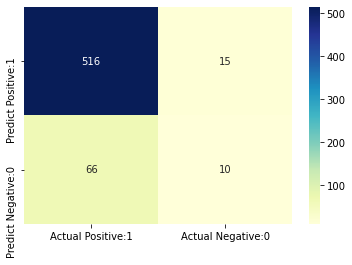

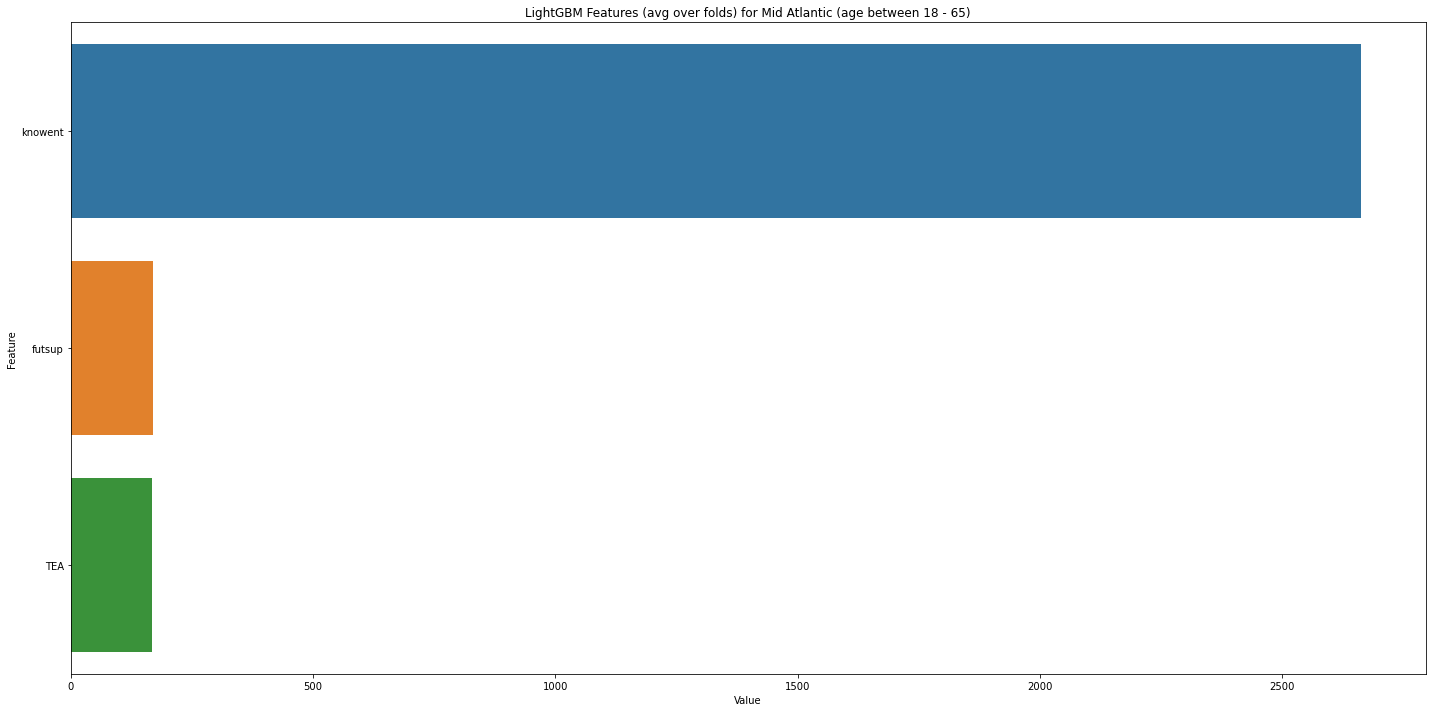

<Figure size 432x288 with 0 Axes>

In [ ]:
#Great Lake with weight L
great_lakes_weightL = pd.read_csv("great_lakes.csv")
cols = ['TEA','knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_L']
great_lakes_weightL = great_lakes_weightL[cols]
great_lakes_weightL['WEIGHT_L'] = great_lakes_weightL['WEIGHT_L'].fillna(0)


great_lakes_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=great_lakes_weightL['TEA']

new_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_L']
x=great_lakes_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,great_lakes_weightL.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8853
Training-set accuracy score: 0.9276
Training set score: 0.9276
Test set score: 0.8853
Confusion matrix

 [[246   7]
 [ 25   1]]

True Positives(TP) =  246

True Negatives(TN) =  1

False Positives(FP) =  7

False Negatives(FN) =  25
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       253
           1       0.12      0.04      0.06        26

    accuracy                           0.89       279
   macro avg       0.52      0.51      0.50       279
weighted avg       0.83      0.89      0.86       279



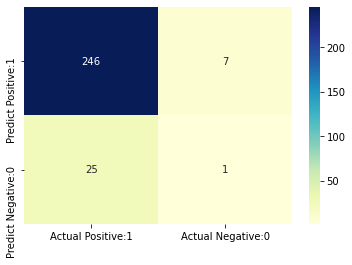

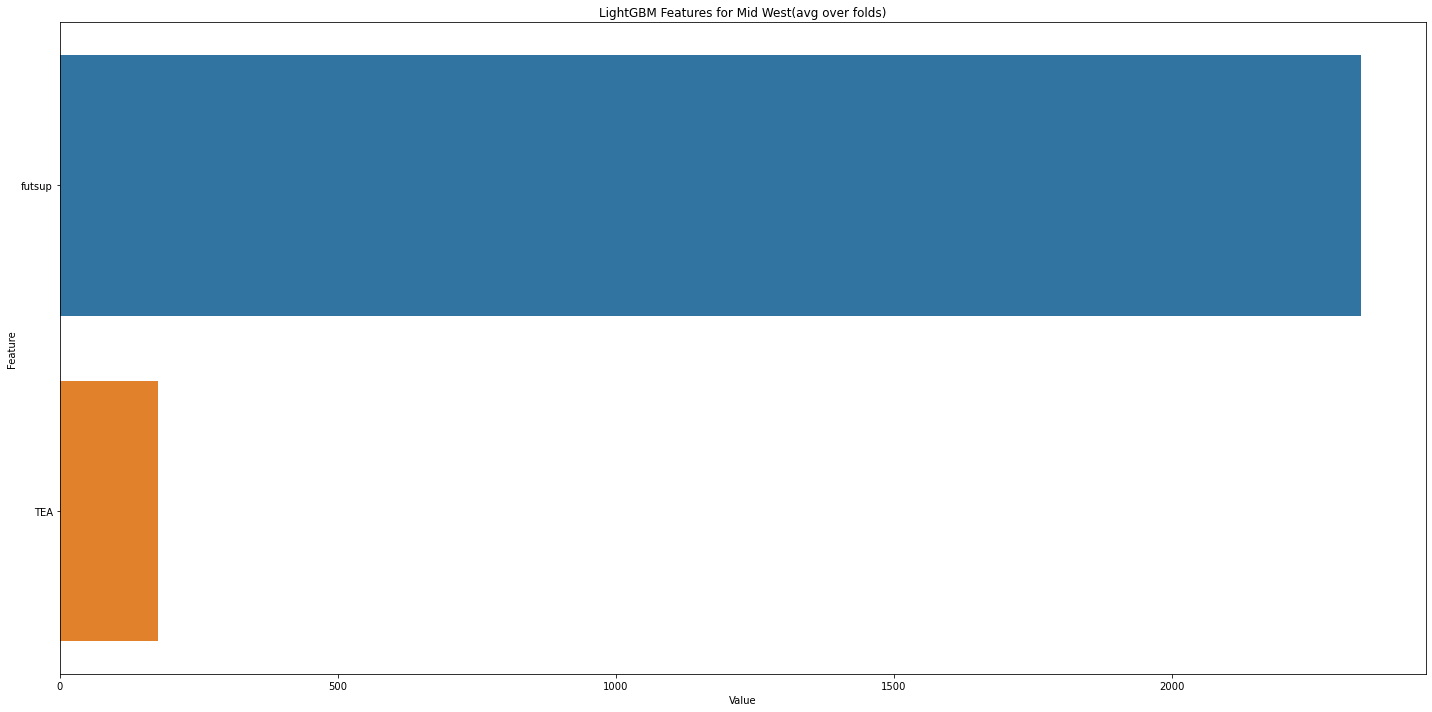

<Figure size 432x288 with 0 Axes>

In [ ]:
#Mid west with Weight A

mid_west = pd.read_csv("mid_west.csv")
cols = ['TEA','futsup','WEIGHT_A']

mid_west = mid_west[cols]
mid_west['TEA'].value_counts()


#Declare feature vector and target variable
y=mid_west['TEA']

new_cols = ['futsup','WEIGHT_A']
x=mid_west[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mid_west.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest(avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')




LightGBM Model accuracy score: 0.8925
Training-set accuracy score: 0.9291
Training set score: 0.9291
Test set score: 0.8925
Confusion matrix

 [[245   8]
 [ 22   4]]

True Positives(TP) =  245

True Negatives(TN) =  4

False Positives(FP) =  8

False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       253
           1       0.33      0.15      0.21        26

    accuracy                           0.89       279
   macro avg       0.63      0.56      0.58       279
weighted avg       0.86      0.89      0.87       279



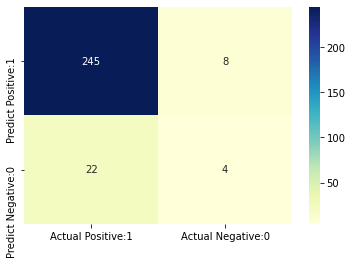

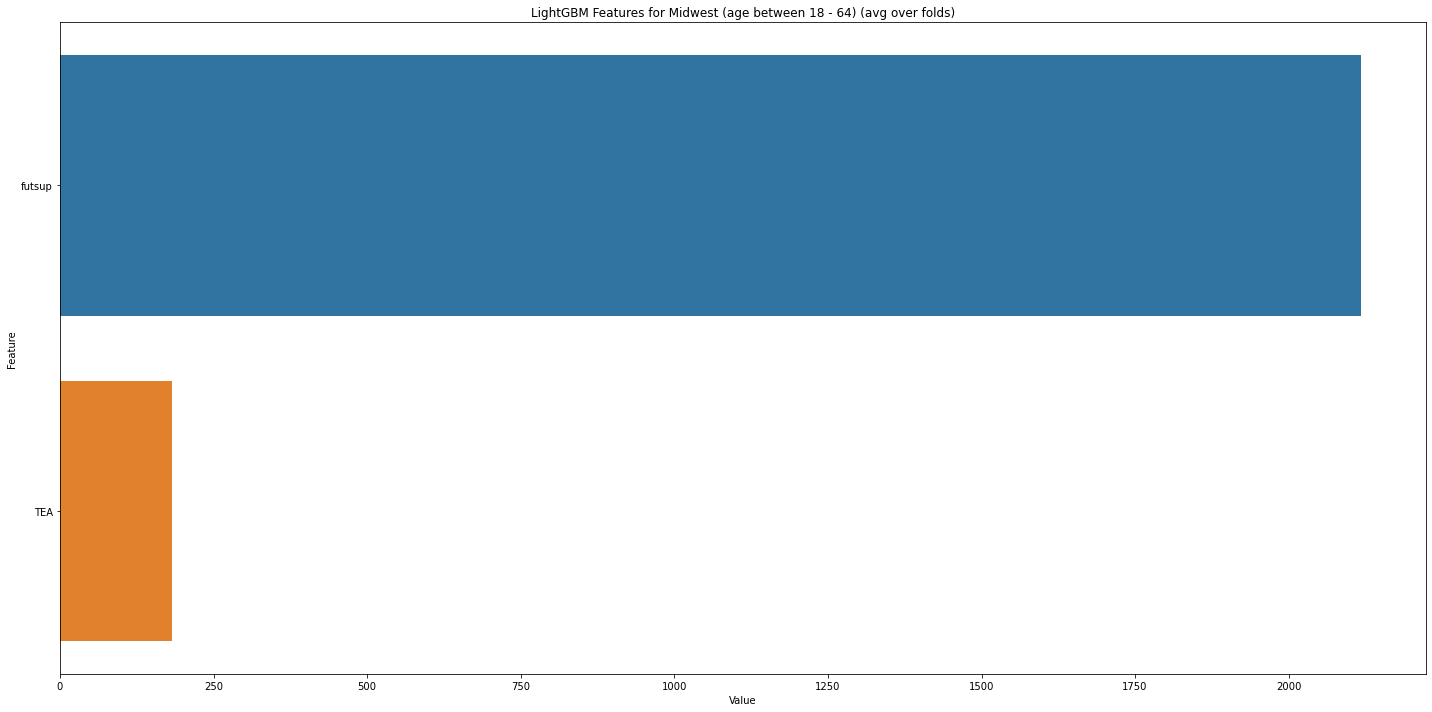

<Figure size 432x288 with 0 Axes>

In [ ]:
#Midwest with weight L
Midwest_weightL = pd.read_csv("midwest.csv")
cols = ['TEA','futsup','WEIGHT_L']
Midwest_weightL = Midwest_weightL[cols]
Midwest_weightL['WEIGHT_L'] = Midwest_weightL['WEIGHT_L'].fillna(0)


Midwest_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=Midwest_weightL['TEA']

new_cols = ['futsup','WEIGHT_L']
x=Midwest_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,Midwest_weightL.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8789
Training-set accuracy score: 0.8977
Training set score: 0.8977
Test set score: 0.8789
Confusion matrix

 [[193   5]
 [ 22   3]]

True Positives(TP) =  193

True Negatives(TN) =  3

False Positives(FP) =  5

False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       198
           1       0.38      0.12      0.18        25

    accuracy                           0.88       223
   macro avg       0.64      0.55      0.56       223
weighted avg       0.84      0.88      0.85       223



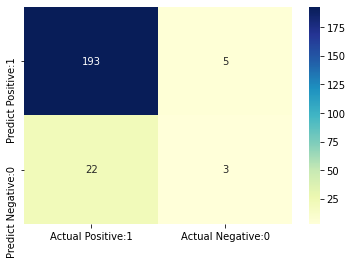

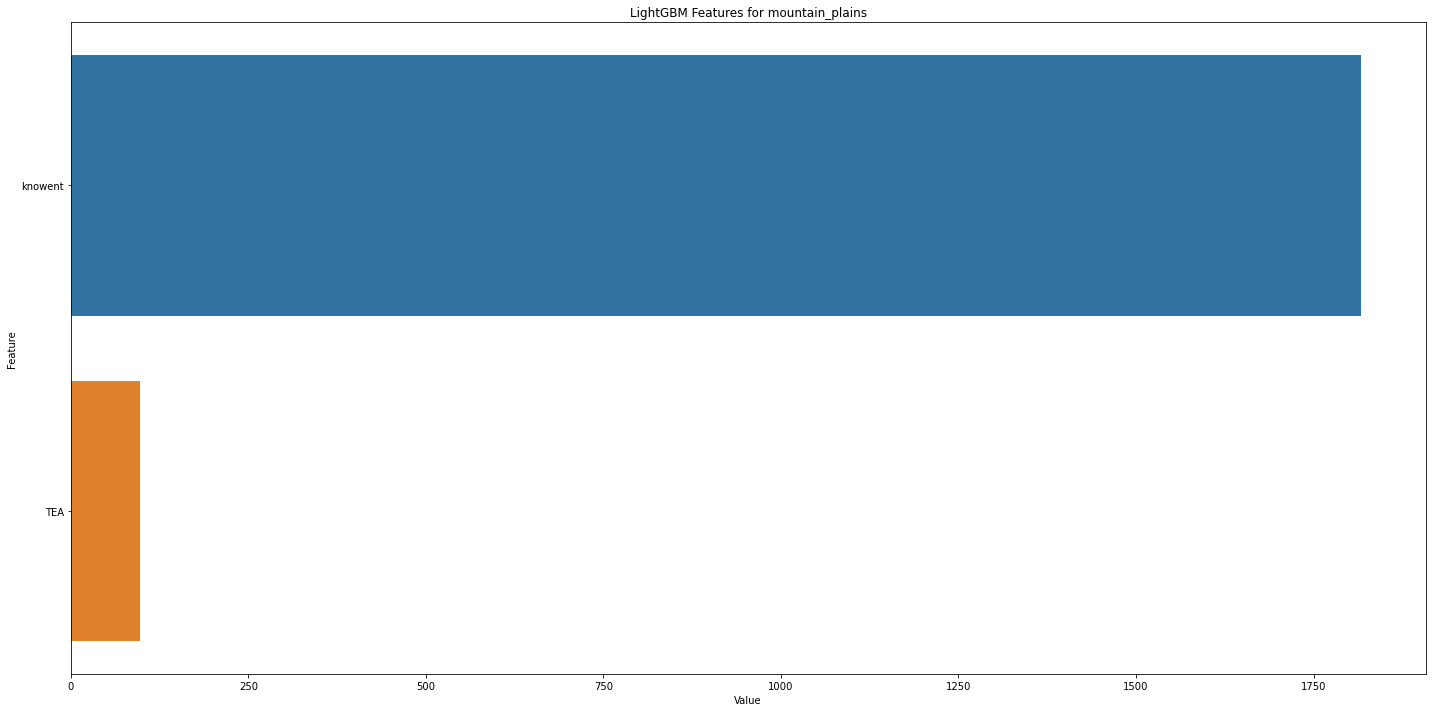

<Figure size 432x288 with 0 Axes>

In [ ]:
#Mountain with Weight A

mountain_plains = pd.read_csv("mountain_plains.csv")
cols = ['TEA','knowent', 'suskill', 'futsup','opport','WEIGHT_A']

mountain_plains = mountain_plains[cols]
mountain_plains['TEA'].value_counts()


#Declare feature vector and target variable
y=mountain_plains['TEA']

new_cols = ['futsup','WEIGHT_A']
x=mountain_plains[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mountain_plains.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for mountain_plains')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


